In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip3 install openpyxl

     |████████████████████████████████| 242 kB 595 kB/s eta 0:00:01


In [3]:
pd.set_option('display.max_columns',100)

In [4]:
df = pd.read_excel('/kaggle/input/flight-dataset/flight_dataset.xlsx')

In [5]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
df.info() # check dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe() # statistics about "int" columns

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.isnull().sum() # check total null values in each column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace=True) # drop null values
df.drop_duplicates(inplace=True) # drop duplicate values

In [10]:
df.columns=df.columns.str.lower() # convert column names in lowercase

In [11]:
# convert columns to_datetime from objects dtype
to_date_col=['date_of_journey','dep_time','arrival_time']
for col_name in to_date_col:
    df[col_name]=pd.to_datetime(df[col_name])

In [12]:
# drop column using funcation
def drop_col(data,column):                
    data.drop([column],inplace=True,axis=1)

In [13]:
# split date_of_journey column to day and month columns
df['journey_day']=df['date_of_journey'].dt.day
df['journey_month']=df['date_of_journey'].dt.month

In [14]:
drop_col(df,'date_of_journey')

In [15]:
# split dep_time column to hour and minute columns
df['dep_time_hour']=df['dep_time'].dt.hour
df['dep_time_min']=df['dep_time'].dt.minute

In [16]:
# split arrival_time column to hour and minute columns
df['arrival_time_hour']=df['arrival_time'].dt.hour
df['arrival_time_min']=df['arrival_time'].dt.minute

In [17]:
drop_col(df,'dep_time') # drop dep_time column
drop_col(df,'arrival_time') # drop arrival_time column

In [18]:
# split route column
split_route=df['route'].str.split("→",expand=True)

In [19]:
split_route[['route1','route2','route3','route4','route5','route6']]=split_route[[0,1,2,3,4,5]]

In [20]:
split_route.drop(columns=[0,1,2,3,4,5],axis=1,inplace=True)

In [21]:
df=pd.concat([df,split_route],axis=1,join='inner') # concat df and split_route columns

In [22]:
drop_col(df,'route')

In [23]:
# split duration column in hour and minute columns
df['duration_hour']=df['duration'].str.split(" ").str[0]
df['duration_min']=df['duration'].str.split(" ").str[1]

In [24]:
drop_col(df,'duration') # drop duration column

In [25]:
df[['duration_hour','h']]=df['duration_hour'].str.split("h",expand=True,) # remove "h" from duration_hour column values

In [26]:
df[['duration_min','m']]=df['duration_min'].str.split("m",expand=True) # remove "m" from duration_minute column values

In [27]:
df.drop(index=6474,inplace=True,) # drop 6474 index

In [28]:
df.reset_index(inplace=True,drop=True) # reset_index

In [29]:
df['duration_min'].fillna(0,inplace=True)

<h2 style="color:#026EE8;"> replace total_stops column values to int</h2>

In [30]:
total_stops_list=list(df['total_stops'].unique())

In [31]:
for i in range(len(total_stops_list)):
    stop_value=total_stops_list[i]
    value=str(stop_value)
    df['total_stops']=df['total_stops'].replace(to_replace={value:i})

In [32]:
# change duration_hour and duration_min columns dtype
df['duration_hour']=df['duration_hour'].astype(int)
df['duration_min']=df['duration_min'].astype(int)

In [33]:
df

,airline,source,destination,total_stops,additional_info,price,journey_day,journey_month,dep_time_hour,dep_time_min,arrival_time_hour,arrival_time_min,route1,route2,route3,route4,route5,route6,duration_hour,duration_min,h,m
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,BLR,DEL,None,None,None,None,2,50,,
1,Air India,Kolkata,Banglore,1,No info,7662,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None,None,7,25,,
2,Jet Airways,Delhi,Cochin,1,No info,13882,6,9,9,25,4,25,DEL,LKO,BOM,COK,None,None,19,0,,NaN
3,IndiGo,Kolkata,Banglore,2,No info,6218,5,12,18,5,23,30,CCU,NAG,BLR,None,None,None,5,25,,
4,IndiGo,Banglore,New Delhi,2,No info,13302,3,1,16,50,21,35,BLR,NAG,DEL,None,None,None,4,45,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,Air Asia,Kolkata,Banglore,0,No info,4107,4,9,19,55,22,25,CCU,BLR,None,None,None,None,2,30,,
10457,Air India,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,20,CCU,BLR,None,None,None,None,2,35,,
10458,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,8,20,11,20,BLR,DEL,None,None,None,None,3,0,,NaN
10459,Vistara,Banglore,New Delhi,0,No info,12648,3,1,11,30,14,10,BLR,DEL,None,None,None,None,2,40,,


In [34]:
df.drop(['h','m'],axis=1,inplace=True)

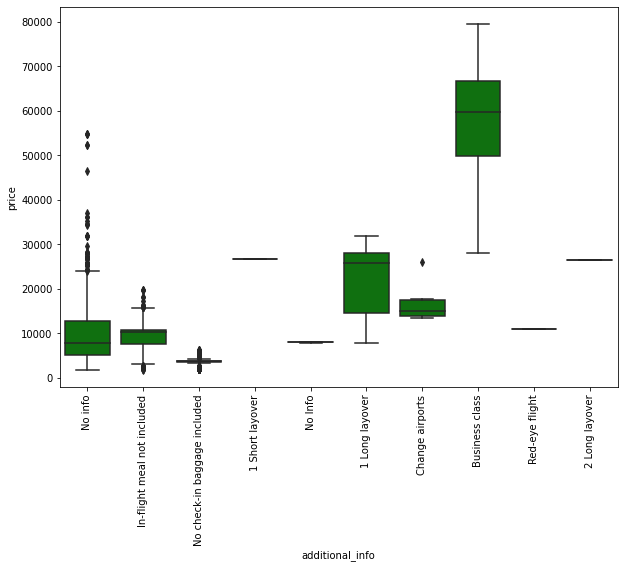

In [35]:
# plot boxplot of additional_info and price columns 
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df['additional_info'],y=df['price'],color='green')
plt.xticks(rotation=90);

<h2 style="color:#026EE8;"> OneHotEncoding</h2>

In [36]:
ohe_add_info=pd.get_dummies(df['additional_info'],drop_first=True)

In [37]:
ohe_add_info.drop(['1 Short layover','2 Long layover','No Info','No check-in baggage included','No info','Red-eye flight'],axis=1,inplace=True)

In [38]:
ohe_add_info.columns=ohe_add_info.columns.str.lower()

In [39]:
df=pd.concat([df,ohe_add_info],join='inner',axis=1)

In [40]:
drop_col(df,'additional_info') # drop additional_info

In [41]:
one_col=pd.get_dummies(df[['airline','source','destination']],drop_first=True)

In [42]:
df=pd.concat([df,one_col],axis=1,join='inner')

In [43]:
# drop columns
drop_col(df,'airline')
drop_col(df,'source')
drop_col(df,'destination')

<h2 style="color:#026EE8;">LabelEncoder</h2>

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()

In [46]:
for i in ['route1','route2','route3','route4','route5','route6']:
    df[i]=le.fit_transform(df[i].astype(str))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


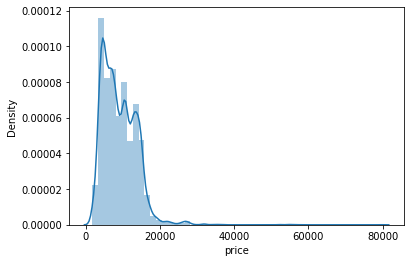

In [47]:
sns.distplot(df['price']); # distplot of price

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


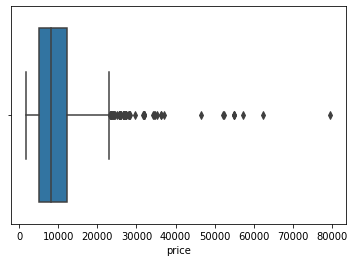

In [48]:
sns.boxplot(df['price']);  # boxplot of price

<h2 style="color:#026EE8;"> Remove outliers in Price column</h2>

In [49]:
df['price']=np.where(df['price']>=28000,df['price'].median(),df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


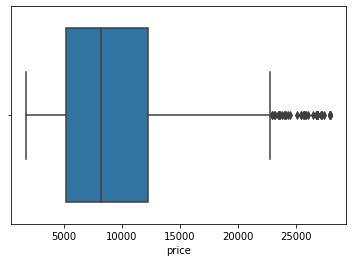

In [50]:
sns.boxplot(df['price']);  # boxplot of price

<h2 style="color:#026EE8;"> FeaturesExtraction</h2>

In [51]:
# sum of columns
df['dep_time_min']=df['dep_time_hour']+df['dep_time_min']
df['arrival_time_min']=df['arrival_time_hour']+df['arrival_time_min']
df['duration_min']=df['duration_hour']+df['duration_min']

In [52]:
# convert hour columns values in minutes
for i in ['dep_time_hour','arrival_time_hour','duration_hour']:
    df[i]=df[i].values*60

In [53]:
# drop hour columns
drop_col(df,'dep_time_hour')
drop_col(df,'arrival_time_hour')
drop_col(df,'duration_hour')

In [54]:
cols_list=list(df.columns)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


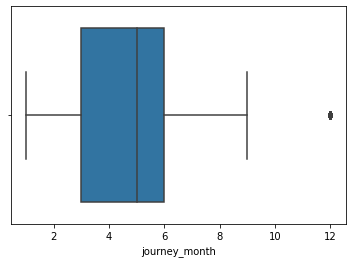

In [55]:
sns.boxplot(df[cols_list[3]]);

<h2 style="color:#026EE8;">Scaled data using StandardScaler</h2>

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
s_scaler=StandardScaler()

In [58]:
scaled_df=s_scaler.fit_transform(df)

In [59]:
new_df=pd.DataFrame(scaled_df,columns=cols_list)

In [60]:
new_df.columns=new_df.columns.str.lower()

## Remove high correlated columns

In [61]:
# Create correlation matrix
corr_matrix = new_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
new_df.drop(to_drop, axis=1, inplace=True)

In [62]:
x=new_df.drop(['price'],axis=1)
y=df['price']

<h2 style="color:#026EE8;"> select best features to predict price value</h2>
<h4> information gain about which features are more importance to predict to target variable(price of flight)</h4>

In [63]:
from sklearn.feature_selection import mutual_info_classif

In [64]:
mic=mutual_info_classif(x,y)

In [65]:
select_fut=pd.DataFrame(mic,index=x.columns)

In [66]:
select_fut.rename(columns={0:'importance'},inplace=True)

In [67]:
sort_fut=select_fut.sort_values(by='importance',ascending=False)
sort_fut

,importance
route2,2.967119
route3,2.500937
arrival_time_min,2.416573
route1,2.280614
dep_time_min,2.203579
total_stops,2.108257
airline_jet airways,2.055431
source_kolkata,1.919545
source_delhi,1.852629
in-flight meal not included,1.778563


#### so you can see mostly all features are useful to predict flight price but you can drop the features according your condition, here I don't drop any features.

In [68]:
df

,total_stops,price,journey_day,journey_month,dep_time_min,arrival_time_min,route1,route2,route3,route4,route5,route6,duration_min,business class,change airports,in-flight meal not included,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Trujet,airline_Vistara,airline_Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897.0,24,3,42,11,0,13,29,13,5,1,52,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,7662.0,5,1,55,28,2,25,1,3,5,1,32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,13882.0,6,9,34,29,3,32,4,5,5,1,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,6218.0,5,12,23,53,2,34,3,13,5,1,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,13302.0,3,1,66,56,0,34,8,13,5,1,49,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,0,4107.0,4,9,74,47,2,5,29,13,5,1,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10457,0,4145.0,27,4,65,43,2,5,29,13,5,1,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10458,0,7229.0,27,4,28,31,0,13,29,13,5,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10459,0,12648.0,3,1,41,24,0,13,29,13,5,1,42,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<h2 style="color:#026EE8;"> train_test_split </h2>

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

<h2 style="color:#026EE8;"> LinearRegression model</h2>

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_predicted=lr.predict(X_test)

In [75]:
y_predicted

array([10221.24174683,  4160.49174683, 11962.99174683, ...,
        8731.24174683, 10381.24174683, 14274.74174683])

In [76]:
lr.score(X_test,y_test)

0.7048322524495184

<h2 style="color:#026EE8;"> LinearRegression model r2_score calculate </h2>

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test,y_predicted)

0.7048322524495184

<h2 style="color:#026EE8;"> Find Mean Square Error using python </h2>

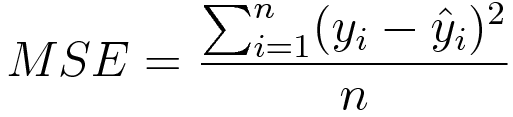

In [79]:
def mse(actual_value,predicted_value):
    n=len(X_test) # Number of training examples
    
    for i in range(n+1):
        y_actual=actual_value  # actual value of flight price
        y_hat=predicted_value  # predicted value of flight price
        difference=y_actual-y_hat  # differnce between actual value and predcted value of price
        square_differnce=difference**2  # square of differnce 
        MSE=sum(square_differnce/n)  # calculate mean square error
        return MSE  # get value of MSE

In [80]:
mse(y_test,y_predicted)

5074859.895344848

<h2 style="color:#026EE8;"> Find Mean Square Error using sklearn </h2>

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
mse=mean_squared_error(y_predicted,y_test)
mse

5074859.895344853

<h2 style="color:#026EE8;"> RandomForestRegressor model</h2>

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rfr=RandomForestRegressor()

In [85]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [86]:
rfr.score(X_test,y_test)

0.9082900995885942

In [87]:
y_pred=rfr.predict(X_test)

<h2 style="color:#026EE8;"> RandomForestRegressor model r2_score calculate</h2>

In [88]:
r2_score(y_test,y_pred)

0.9082900995885942

In [89]:
df

,total_stops,price,journey_day,journey_month,dep_time_min,arrival_time_min,route1,route2,route3,route4,route5,route6,duration_min,business class,change airports,in-flight meal not included,airline_Air India,airline_GoAir,airline_IndiGo,airline_Jet Airways,airline_Jet Airways Business,airline_Multiple carriers,airline_Multiple carriers Premium economy,airline_SpiceJet,airline_Trujet,airline_Vistara,airline_Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897.0,24,3,42,11,0,13,29,13,5,1,52,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,7662.0,5,1,55,28,2,25,1,3,5,1,32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,13882.0,6,9,34,29,3,32,4,5,5,1,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,6218.0,5,12,23,53,2,34,3,13,5,1,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,13302.0,3,1,66,56,0,34,8,13,5,1,49,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,0,4107.0,4,9,74,47,2,5,29,13,5,1,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10457,0,4145.0,27,4,65,43,2,5,29,13,5,1,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10458,0,7229.0,27,4,28,31,0,13,29,13,5,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10459,0,12648.0,3,1,41,24,0,13,29,13,5,1,42,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<h2 style="color:#026EE8;"> Hypertunning the model</h2>

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20,25,30,35,40],
    }

In [92]:
rscv=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,cv=10,verbose=2,n_jobs=-1)

In [93]:
rscv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220]},
                   verbose=2)

In [94]:
# best parameters
rscv.best_params_

{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 15}

In [95]:
# predicting the values
Y_predication=rscv.predict(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


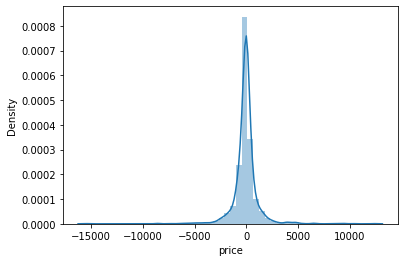

In [96]:
# plot chart
sns.distplot(y_test-Y_predication);

<h2 style="color:#026EE8;"> RandomizedSearchCV r2_score caculate</h2>

In [97]:
r2_score(y_test,Y_predication)

0.9100118596068953

 <h2 style="color:#026EE8;"> Lasso Regression</h2>

In [98]:
from sklearn.linear_model import Lasso

In [99]:
lasso=Lasso()

In [100]:
lasso.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17371788.072547913, tolerance: 15582118.836239949
  positive)


Lasso()

In [101]:
lasso.score(X_test,y_test)

0.7050286859394139

In [102]:
y_Pred=lasso.predict(X_test)

<h2 style="color:#026EE8;">Lasso Regression R2 score calculate</h2>

In [103]:
r2_score(y_test,y_Pred)

0.7050286859394139

<h2 style="color:#026EE8;">Ridge Regression</h2>

In [104]:
from sklearn.linear_model import Ridge

In [105]:
ridge=Ridge()

In [106]:
ridge.fit(X_train,y_train)

Ridge()

In [107]:
ridge.score(X_test,y_test)

0.7049284019774422

<h2 style="color:#026EE8;">Decision Tree Regression</h2>

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
dtr=DecisionTreeRegressor()

In [110]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [111]:
dtr.score(X_test,y_test)

0.837209345269577

In [112]:
dtr_y_pred=dtr.predict(X_test)

<h2 style="color:#026EE8;">Decision Tree Regression R2 score calculate</h2>

In [113]:
r2_score(y_test,dtr_y_pred)

0.837209345269577